In [ ]:
#Importieren von Bibliotheken
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Daten laden
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Datenbereinigung
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [17]:
df_GER = df[(df['job_country'] == 'Germany')].dropna(subset=['salary_year_avg'])  

In [3]:
job_titles = df_GER['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Senior Data Scientist']

In [4]:
df_GER_top6 = df_GER[df_GER['job_title_short'].isin(job_titles)]

In [5]:
job_order = df_GER_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

<function matplotlib.pyplot.show(close=None, block=None)>

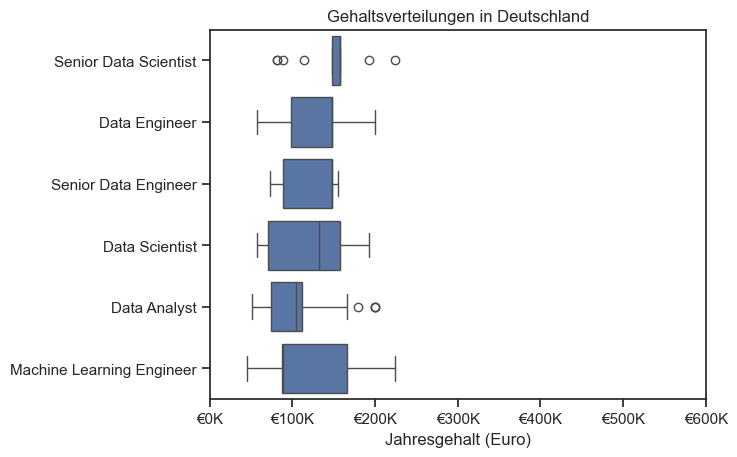

In [16]:
sns.boxplot(data=df_GER_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Gehaltsverteilungen in Deutschland')
plt.xlabel('Jahresgehalt (Euro)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'€{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show

In [9]:
df_DA_GER = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_GER = df_DA_GER.dropna(subset=['salary_year_avg'])

In [10]:
df_DA_GER = df_DA_GER.explode('job_skills')

df_DA_GER[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [11]:
df_DA_top_pay=  df_DA_GER.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median',ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [12]:
df_DA_skills = df_DA_GER.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


<function matplotlib.pyplot.show(close=None, block=None)>

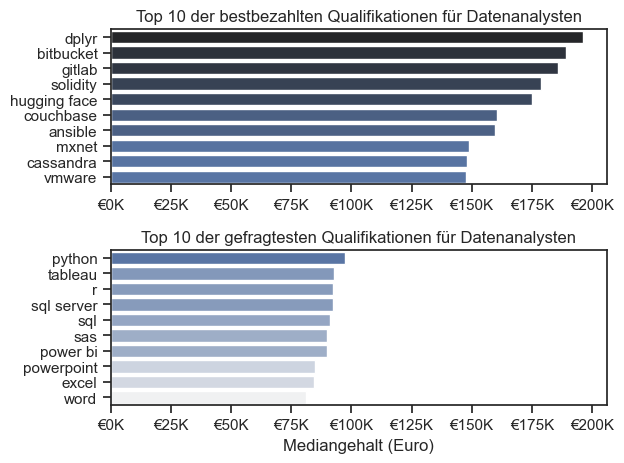

In [19]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 der bestbezahlten Qualifikationen für Datenanalysten')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'€{int(x/1000)}K'))

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 der gefragtesten Qualifikationen für Datenanalysten')
ax[1].set_ylabel('')
ax[1].set_xlabel('Mediangehalt (Euro)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'€{int(x/1000)}K'))

plt.tight_layout()
plt.show
